In [1]:
from unidec_modules.v3_SeqChrom import *

In [2]:
eng = SeqChrom()


UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe


Added in option to load multipe mzml files into engine before metaunidec processing.

In [3]:
directory = "D:\\211203 mass spec\\Srt mutants 4 hrs"

plate_map = map_path = "C:\\Users\\cm19ljc\\Documents\\GitHub\\UniDec\\reaction maps\\211214 Srt mutant CTB labelling 2 hours.xlsx"

In [4]:
eng.load_multi_single(directory, t0 = 2.0, t1 = 2.5, )

Error: No HDF5 file present. Please create an HDF5 file first

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe
Reading mzML: D:\211203 mass spec\Srt mutants 4 hrs\211203 1-3M 4hrs_338483_RB1_01_80970.d.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: D:\211203 mass spec\Srt mutants 4 hrs\211203 1-3M 4hrs_338483_RB1_01_80970.d.mzML.gz
Error getting TIC in mzML; trying to make it...


C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_modules\mzMLimporter.py:311: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.data = np.array(self.data)


Imported Data. Constructing TIC
Done
717 2
Noise Level: 0.06619777841532581 Window: 0.2
Bad Peak [0.770683   0.12327923] 0.041516999999999915 [0.758233, 0.79975]
2.31132 0.5146800000000002
Bad Peak [2.86748    0.43689561] 0.85507 [2.09128, 2.94635]
3.58147 0.1286299999999998
Getting scans: [300, 419]
Length merge axis: 44770
0
1

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe
Reading mzML: D:\211203 mass spec\Srt mutants 4 hrs\211203 1M 4hrs_338480_RA6_01_80967.d.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: D:\211203 mass spec\Srt mutants 4 hrs\211203 1M 4hrs_338480_RA6_01_80967.d.mzML.gz
Error getting TIC in mzML; trying to make it...
Imported Data. Constructing TIC
Done
718 2
Noise Level: 0.053733871092682906 Window: 0.2
0.991183 0.12045000000000006
2.39067 0.38194999999

In [5]:
# TIC/time point invalidation 
# add option to delete index in TIC data 
# add option to invalidate specific time/species 
# add option to plot bar chart instead of scatter/line - especially useful for comparison of diff species

n.b. lowering the peakthresh may result in noise being recognised as a peak and thereby generating false data.
>start high e.g. 0.1 and lower as appropriate 

In [6]:
# eng.update_config(masslb = 10000, massub = 90000, peakthresh = 0.01, datanorm = 0, 
#                  beta = 0, peaknorm = 1, exnorm = 1, numit=50, numz=50,
#                  endz=50, startz=1,zzsig=1.0, psig=1.0,mzsig=1.0,psfun=0,msig=0.0,molig=0.0,
#                  massbins=1.0,mtabsig=0.0, subbuff=0.0, subtype=2, mzbins=0.0, 
#                  peakwindow=10.0, smooth = 0)
eng.update_config(masslb = 10000, massub = 90000)
eng.process_data()
eng.run_unidec()
eng.pick_peaks()
eng.integrate_all()

Failed Automatic Peak Width: list indices must be integers or slices, not tuple
[]
Execution Time: 0.06733729999999838
Execution Time: 36.81132219999999
Execution Time: 1.069174199999992
Peak info saved to: UniDec_Figures_and_Files\.hdf5_extracts.txt


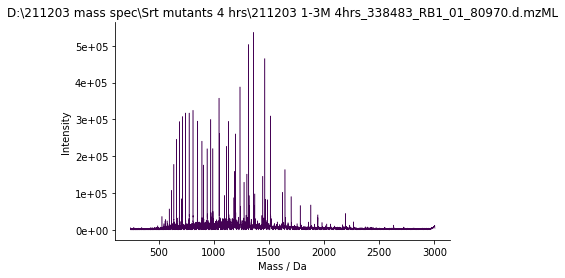

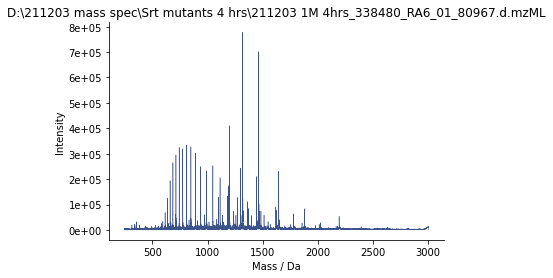

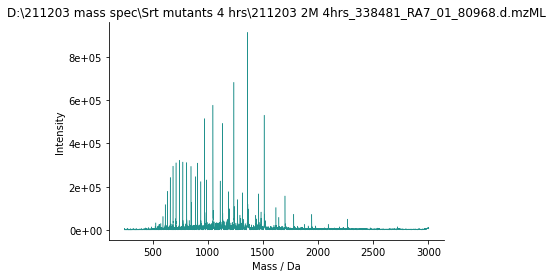

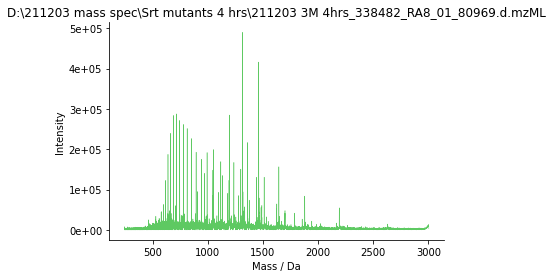

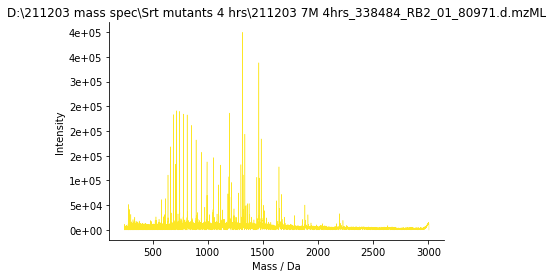

In [7]:
eng.plot_all(dtype = 'data2', combine = False, cmap = 'viridis')

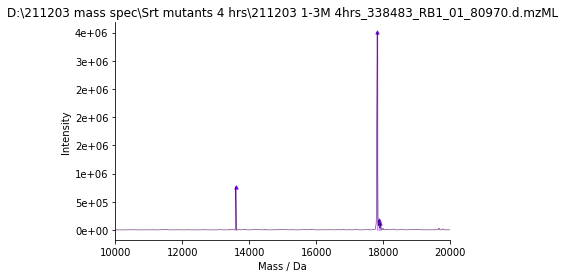

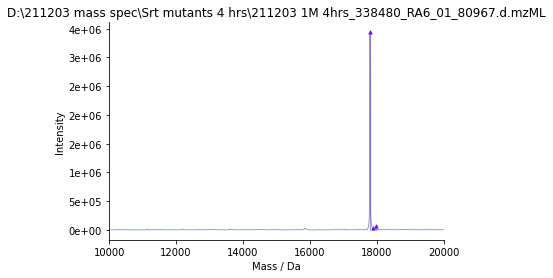

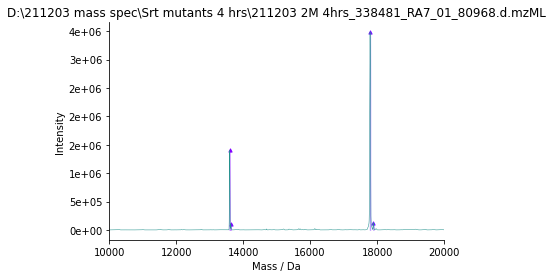

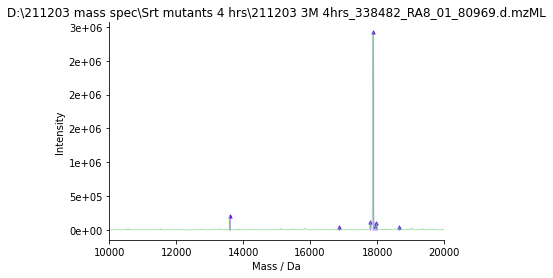

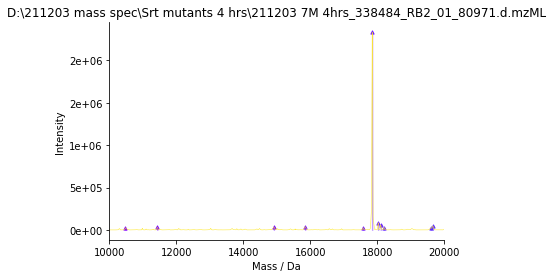

In [8]:
eng.plot_all(dtype = 'massdat', combine = False, cmap = 'viridis', xlim = [10000, 20000])

In [9]:
eng.upload_map(map_path)

(      Reaction     Species  Concentration Units      Mass Reagent_Type  \
 0  Srt mutants      CTB-H6          100.0    uM  13597.42      Protein   
 1  Srt mutants  CTB-GVSEYG            NaN    uM  13151.97      Protein   
 2  Srt mutants      CTB-OH            NaN    uM  12559.36      Protein   
 
   Sequence  
 0      NaN  
 1      NaN  
 2      NaN  ,
             Type     Reaction Time Sortase  Species  Valid
 Well ID                                                   
 1        Protein  Srt mutants    2      1M      NaN   True
 2        Protein  Srt mutants    2      2M      NaN   True
 3        Protein  Srt mutants    2      3M      NaN   True
 4        Protein  Srt mutants    2    1+3M      NaN   True
 5        Protein  Srt mutants    2      5M      NaN   True)

In [10]:
eng.pmap

,Type,Reaction,Time,Sortase,Species,Valid
Well ID,,,,,,
1,Protein,Srt mutants,2,1M,NaN,True
2,Protein,Srt mutants,2,2M,NaN,True
3,Protein,Srt mutants,2,3M,NaN,True
4,Protein,Srt mutants,2,1+3M,NaN,True
5,Protein,Srt mutants,2,5M,NaN,True


In [11]:
eng.speciesmap

,Reaction,Species,Concentration,Units,Mass,Reagent_Type,Sequence
0,Srt mutants,CTB-H6,100.0,uM,13597.42,Protein,NaN
1,Srt mutants,CTB-GVSEYG,NaN,uM,13151.97,Protein,NaN
2,Srt mutants,CTB-OH,NaN,uM,12559.36,Protein,NaN


In [12]:
eng.process_maps(groupby = 'Reaction', variable = 'Sortase', matchfilenames = True)

KeyError: 'Filename'

In [ ]:
len(eng.data.spectra)

In [ ]:
eng.pmap2

invalidate data using eng.invalidate()

In [ ]:
eng.peak_match(silent = True)
eng.normalise_peaks(silent = True)

eng.plot_data(plot_type='bar', groupby='Sortase')